In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

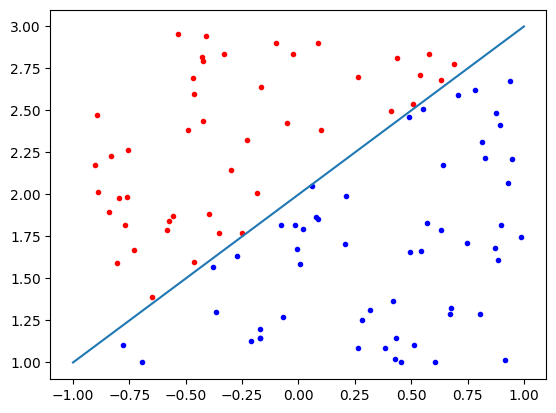

In [2]:
Slope = 1
Intercept = 2

NumberPoints = 100
NoiseVariance = 0.1

Xmin = -1
Xmax =  1

Ymin = Slope * Xmin + Intercept
Ymax = Slope * Xmax + Intercept

PointX = (Xmax-Xmin) * np.random.rand( NumberPoints , 1 ) + Xmin
PointY = (Ymax-Ymin) * np.random.rand( NumberPoints , 1 ) + Ymin

LineFunction = PointY - ( Slope * PointX + Intercept )
PointClass = np.sign( LineFunction )

for i in range( NumberPoints ):
    if PointClass[i]>0 :
        plt.plot( PointX[i] , PointY[i] , '.r' )
    else :
        plt.plot( PointX[i] , PointY[i] , '.b' )

plt.plot( [Xmin,Xmax] , [Ymin,Ymax] )
plt.show()

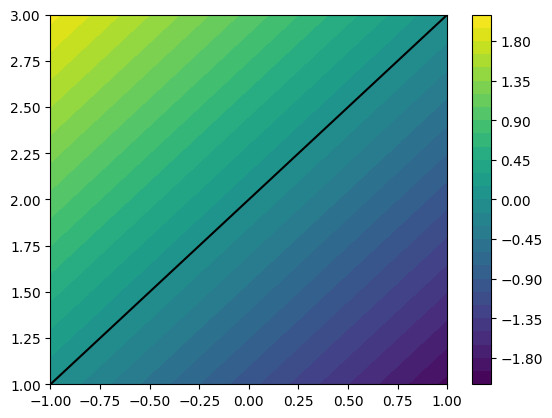

In [3]:
GridSize = 30

AxisX = np.linspace( Xmin , Xmax , GridSize )
AxisY = np.linspace( Ymin , Ymax , GridSize )

GridX, GridY = np.meshgrid( AxisX , AxisY )

GridLineFunction = GridY - ( Slope * GridX + Intercept )

# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.plot_surface( GridX , GridY , GridPointClass )
# ax.plot_surface( GridX , GridY , 0*GridPointClass )

plt.contourf( GridX , GridY , GridLineFunction , 30 )
plt.plot( [Xmin,Xmax] , [Ymin,Ymax] , 'k' )
plt.colorbar()
plt.show()

Error =  12.153308068926473 XWeight =  0.011843612275878296 YWeight =  -0.11231220094200797 CWeight =  -0.0511835037422981
Error =  21.96059808596038 XWeight =  0.021302091956497637 YWeight =  0.6113035417187479 CWeight =  0.2296016785081714
Error =  23.905629804040004 XWeight =  0.023605697144171447 YWeight =  0.6044817227979363 CWeight =  0.2239704254603794
Error =  19.97094154940192 XWeight =  0.023114258380168253 YWeight =  0.6019110178596645 CWeight =  0.22223102232605435
Error =  19.96966534757913 XWeight =  0.022668345993951997 YWeight =  0.5994224994397627 CWeight =  0.22041785253305765
Error =  15.933535619522827 XWeight =  0.023637679837451183 YWeight =  0.5943666184477985 CWeight =  0.21644953201596914
Error =  27.938361793923377 XWeight =  0.022761865403023197 YWeight =  0.5891102770774679 CWeight =  0.21276223333834715
Error =  11.969365008447987 XWeight =  0.02212005629496995 YWeight =  0.5866364286076636 CWeight =  0.21093171179469136
Error =  11.93296748315396 XWeight =

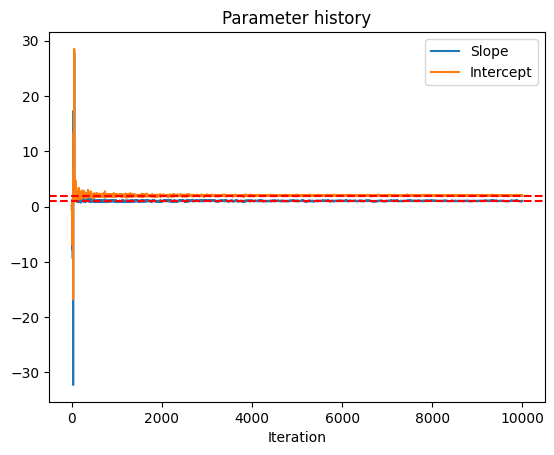

In [19]:
XWeight = 0.1
YWeight = 0.1
CWeight = 0.1

Alpha = 3

NumberIterations = 10000
LearningRate = 0.01
BatchSize = 10

XWeightHistory = []
YWeightHistory = []
CWeightHistory = []

for It in range( NumberIterations ):
    Index = np.random.permutation( len(PointX) )

    BatchPointX = PointX[ Index[1:BatchSize] ]
    BatchPointY = PointY[ Index[1:BatchSize] ]

    BatchPointClass = PointClass[ Index[1:BatchSize] ]
    
    LineFunctionEstimate = YWeight * BatchPointY + XWeight * BatchPointX + CWeight
    PointClassEstimate = np.tanh( Alpha * LineFunctionEstimate )

    Sech = 1 / np.cosh( Alpha * LineFunctionEstimate )

    Error = np.sum( ( BatchPointClass - PointClassEstimate )**2 )
    dError_dXWeight = np.sum( -2 * ( BatchPointClass - PointClassEstimate ) * Alpha * Sech**2 * BatchPointX )
    dError_dYWeight = np.sum( -2 * ( BatchPointClass - PointClassEstimate ) * Alpha * Sech**2 * BatchPointY )
    dError_dCWeight = np.sum( -2 * ( BatchPointClass - PointClassEstimate ) * Alpha * Sech**2 )

    XWeight = XWeight - LearningRate * dError_dXWeight
    YWeight = YWeight - LearningRate * dError_dYWeight
    CWeight = CWeight - LearningRate * dError_dCWeight

    XWeightHistory = np.append( XWeightHistory , XWeight )
    YWeightHistory = np.append( YWeightHistory , YWeight )
    CWeightHistory = np.append( CWeightHistory , CWeight )

    print( "Error = ",Error, "XWeight = ",XWeight, "YWeight = ",YWeight, "CWeight = ", CWeight ) 

plt.plot( - XWeightHistory / YWeightHistory )
plt.plot( - CWeightHistory / YWeightHistory )
plt.title( 'Parameter history' )
plt.xlabel( 'Iteration' )
plt.legend( ['Slope' , 'Intercept'] )
plt.axhline( y=Slope , color='r' , linestyle='--' )
plt.axhline( y=Intercept , color='r' , linestyle='--' )
plt.show()

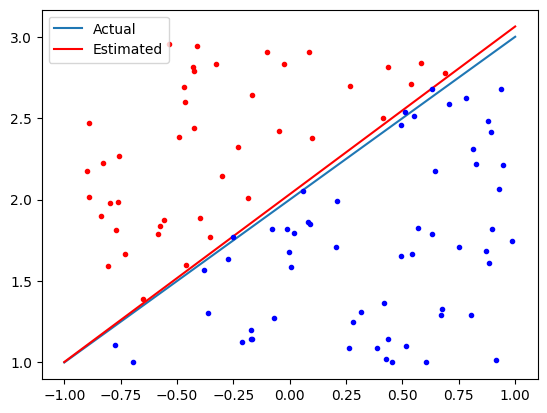

In [20]:
SlopeEstimate = - XWeight / YWeight
InterceptEstimate = - CWeight / YWeight

LineFunctionEstimate = PointY - ( SlopeEstimate * PointX + InterceptEstimate )
PointClassEstimate = np.sign( LineFunctionEstimate )

YminEstimate = SlopeEstimate * Xmin + InterceptEstimate
YmaxEstimate = SlopeEstimate * Xmax + InterceptEstimate

plt.plot( [Xmin,Xmax] , [Ymin,Ymax] )
plt.plot( [Xmin,Xmax] , [YminEstimate,YmaxEstimate] , 'r' )
plt.legend( ["Actual","Estimated"])

for i in range( NumberPoints ):
    if PointClassEstimate[i]==1 :
        plt.plot( PointX[i] , PointY[i] , '.r' )
    else :
        plt.plot( PointX[i] , PointY[i] , '.b' )

plt.show()